## 七月在线机器学习第九期第二阶段考试
#### 考试说明:
- 起止时间：请同学在2018年7月11日至7月18日期间完成，最晚提交时间（7月18日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学将该试卷进行复制后，改名为自己姓名后，如State2Exam-WangWei.ipynb，<b>移动</b>至/0.Teacher/Exam/Stage2/目录下后，进行答题。
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:陈宇
- 批改人：   
- 最终得分:

<center><h1>####答卷开始####</h1></center>
<hr>

## 问答题(共5题，每题10分，共计50分)

#### 1. 请写出你了解的机器学习特征工程操作都有哪些，及它们的具体实现？

一、数据清洗

    考虑哪些信息对模型预测是有效的，去除脏数据
    
二、数据采样

    大多数模型对正负样本比是比较敏感的。当正样本量远大于负样本量，且量都很大时，使用下采样；当正样本量远大于负样本量，且量不大时，可
采集更多数据，或使用上采样(比如图像识别中的旋转与镜像变换)，或修改损失函数权重。

三、特征处理

    1.数值型：幅度调整(归一化/标准化)；log数据域变化；数据离散化
    
    2.类别型：one-hot独热向量编码；hash技巧(针对文本类型数据)；Histogram映射
    
    3.时间型：抽取年、月、日、星期几、季节等信息
    
    4.文本型：词袋模型(映射为稀疏向量)；使用Tf-idf特征
    
    5.统计型：加减平均；分位线；次序型；比例类
    
    6.组合特征：简单特征拼接；模型特征组合(用GBDT产出特征组合路径)
    
四、特征选择

    1.过滤型：评估单个特征和结果的相关程度，排序留下top相关的特征
    
    2.包裹型：实质为特征子集搜索，筛选各种特征子集，用模型评估效果，
    
    3.嵌入型：选用模型分析特征的重要性，最常见为L1正则化

#### 2.模型评估中的留一法，留出法，交叉验证分别是什么操作？

留出法：直接将数据集$D$划分为两个互斥的集合，其中一个集合作为训练集$S$，另一个作为测试集$T$，即$D=S∪T$，$S∩T=\varnothing$，在$S$上训练出模型后，用$T$来评估其测试误差，作为对泛化误差的估计。

交叉验证：先将数据集$D$划分为$k$个大小相似的互斥子集，即$D=D_1∪D_2...∪D_k$，$D_i∩D_j=\varnothing(i≠j)$。每个子集$D_i$都尽可能地保持数据分布的一致性，即从$D$中通过分层采样得到。然后，每次用$k-1$个子集的并集作为训练集，余下的那个子集作为测试集；这样就可获得$k$组训练/测试集，从而可进行$k$次训练和测试，最终返回的是这$k$个测试结果的均值。

留一法：假定数据集$D$中包含$m$个样本，则留一法则是交叉验证在$k=m$时的特例，即只有一种划分方式的交叉验证。

#### 3.网格搜索交叉验证的作用是什么，并简述网格搜索交叉验证是如何运行的？

网格搜索算法是一种通过遍历给定的参数组合来优化模型表现的方法。

以决策树为例，当我们确定了要使用决策树算法的时候，为了能够更好地拟合和预测，我们需要调整它的参数。在决策树算法中，我们通常选择的参数是决策树的最大深度。

于是我们会给出一系列的最大深度的值，比如 {'max_depth': [1,2,3,4,5]}，我们会尽可能包含最优最大深度。

不过，我们如何知道哪一个最大深度的模型是最好的呢？我们需要一种可靠的评分方法，对每个最大深度的决策树模型都进行评分，这其中非常经典的一种方法就是交叉验证，下面我们就以K折交叉验证为例，详细介绍它的算法过程。

首先我们先看一下数据集是如何分割的。我们拿到的原始数据集首先会按照一定的比例划分成训练集和测试集。比如下图，以8:2分割的数据集：

![title](1.png)

训练集用来训练我们的模型，它的作用就像我们平时做的练习题；测试集用来评估我们训练好的模型表现如何，它的作用像我们做的高考题，这是要绝对保密不能提前被模型看到的。

因此，在K折交叉验证中，我们用到的数据是训练集中的所有数据。我们将训练集的所有数据平均划分成K份（通常选择K=10），取第K份作为验证集，它的作用就像我们用来估计高考分数的模拟题，余下的K-1份作为交叉验证的训练集。

对于我们最开始选择的决策树的5个最大深度 ，以 max_depth=1 为例，我们先用第2-10份数据作为训练集训练模型，用第1份数据作为验证集对这次训练的模型进行评分，得到第一个分数；然后重新构建一个 max_depth=1 的决策树，用第1和3-10份数据作为训练集训练模型，用第2份数据作为验证集对这次训练的模型进行评分，得到第二个分数……以此类推，最后构建一个 max_depth=1 的决策树用第1-9份数据作为训练集训练模型，用第10份数据作为验证集对这次训练的模型进行评分，得到第十个分数。于是对于 max_depth=1 的决策树模型，我们训练了10次，验证了10次，得到了10个验证分数，然后计算这10个验证分数的平均分数，就是 max_depth=1 的决策树模型的最终验证分数。

![title](2.png)

对于 max_depth = 2,3,4,5 时，分别进行和 max_depth=1 相同的交叉验证过程，得到它们的最终验证分数。然后我们就可以对这5个最大深度的决策树的最终验证分数进行比较，分数最高的那一个就是最优最大深度，我们利用最优参数在全部训练集上训练一个新的模型，整个模型就是最优模型。

#### 4.工业界上模型融合有三大类方式？试简述每类方式其思想？

$Boosting:$先从初始训练集训练出一个基学习器，再根据基学习器的表现对训练样本分布进行调整，使得先前基学习器做错的训练样本在后续受到更多关注，然后基于调整后的样本分布来训练下一个基学习器，如此重复进行，直至基学习器数目达到事先指定的值$T$，最终将这$T$个基学习器进行加权结合。

$Bagging:$给定包含$m$个样本的数据集，先随机取出一个样本放入采样集中，再把该样本放回初始数据集，使得下次采样时该样本仍有可能被选中，这样，经过$m$次随机采样操作，得到含$m$个样本的采样集，初始训练集中有的样本在采样集中多次出现，有的则从未出现。照这样可采样出$T$个含$m$个训练样本的采样集，然后基于每个采样集训练出一个基学习器，再将这些基学习器进行结合。在对预测输出进行结合时，通常对分类任务使用简单投票法，对回归任务使用简单平均法。

$Stacking:$将训练集在多个初级学习器中的学习结果作为输入，将训练集的输出作为输出，重新训练一个次级学习器来得到最终结果。对于测试集，首先用初级学习器预测一次，得到次级学习器的输入样本，再用次级学习器预测一次，得到最终的预测结果。

#### 5.Early Stopping指的是什么？与它相关的概念有哪些？它们在实际项目中如何被运用？

**目的**

为了获得性能良好的神经网络，网络定型过程中需要进行许多关于所用设置（超参数）的决策。超参数之一是定型周期（$epoch$）的数量：亦即应当完整遍历数据集多少次（一次为一个$epoch$）？如果$epoch$数量太少，网络有可能发生欠拟合（即对于定型数据的学习不够充分）；如果$epoch$数量太多，则有可能发生过拟合（即网络对定型数据中的“噪声”而非信号拟合）。

$Early Stopping$法旨在解决$epoch$数量需要手动设置的问题。它也可以被视为一种能够避免网络发生过拟合的正则化方法（与$L1/L2$权重衰减和丢弃法类似）。其根本原因就是因为继续训练会导致测试集上的准确率下降。那继续训练导致测试准确率下降的原因猜测可能是1. 过拟合 2. 学习率过大导致不收敛

**原理**

1.将数据分为训练集和验证集
2.每个$epoch$结束后（或每$N$个$epoch$后）： 在验证集上获取测试结果，随着$epoch$的增加，如果在验证集上发现测试误差上升，则停止训练；
3.将停止之后的权重作为网络的最终参数

## 代码题(共1题，共计50分)

#### 1.使用XGBoost的sklearn接口，对KaggleCredit2数据完成信用卡欺诈项目的建模及分析
- 要求以不同参数设置xgboost运行并进行效果比对,记录，最后给出实验报告

- KaggleCredit2数据文件 位于/home/ml9/0.Teacher/Data，请勿复制或移动

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('/home/ml9/0.Teacher/Data/KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [5]:
data.shape

(112915, 11)

In [7]:
data.isnull().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [8]:
data.dropna(inplace = True)
data.shape

(108648, 11)

In [9]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 35)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(76053, 10)
(32595, 10)
(76053,)
(32595,)


In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [13]:
model_1 = XGBClassifier()
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
print('Accuracy: %.2f%%' % (accuracy_1 * 100.0))

Accuracy: 93.64%


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))

             precision    recall  f1-score   support

          0       0.94      0.99      0.97     30422
          1       0.58      0.18      0.27      2173

avg / total       0.92      0.94      0.92     32595



In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [21]:
model_2 = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid_1 = dict(learning_rate = learning_rate)
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 35)
grid_search_1 = GridSearchCV(estimator = model_2, param_grid = param_grid_1, cv = kfold)
grid_search_1.fit(X_train, y_train)
print('Best: %f using %s ' % (grid_search_1.best_score_, grid_search_1.best_params_))

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Best: 0.935953 using {'learning_rate': 0.1} 


In [22]:
means = grid_search_1.cv_results_['mean_test_score']
stds = grid_search_1.cv_results_['std_test_score']
params = grid_search_1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r ' % (mean, stdev, param))

0.934440 (0.000491) with: {'learning_rate': 0.0001} 
0.934743 (0.001025) with: {'learning_rate': 0.001} 
0.934993 (0.000688) with: {'learning_rate': 0.01} 
0.935953 (0.000896) with: {'learning_rate': 0.1} 
0.935492 (0.000686) with: {'learning_rate': 0.2} 
0.935532 (0.000820) with: {'learning_rate': 0.3} 


In [23]:
max_depth = [3, 4, 5, 6, 7, 8, 9]
min_child_weight = [1, 2, 3, 4]
param_grid_2 = dict(max_depth = max_depth, min_child_weight = min_child_weight)
grid_search_2 = GridSearchCV(estimator = model_2, param_grid = param_grid_2, cv = kfold)
grid_search_2.fit(X_train, y_train)
print('Best: %f using %s ' % (grid_search_2.best_score_, grid_search_2.best_params_))

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Best: 0.935953 using {'min_child_weight': 1, 'max_depth': 3} 


In [24]:
means = grid_search_2.cv_results_['mean_test_score']
stds = grid_search_2.cv_results_['std_test_score']
params = grid_search_2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r ' % (mean, stdev, param))

0.935953 (0.000896) with: {'min_child_weight': 1, 'max_depth': 3} 
0.935716 (0.000845) with: {'min_child_weight': 2, 'max_depth': 3} 
0.935558 (0.000892) with: {'min_child_weight': 3, 'max_depth': 3} 
0.935690 (0.000785) with: {'min_child_weight': 4, 'max_depth': 3} 
0.935782 (0.000781) with: {'min_child_weight': 1, 'max_depth': 4} 
0.935729 (0.000601) with: {'min_child_weight': 2, 'max_depth': 4} 
0.935492 (0.000350) with: {'min_child_weight': 3, 'max_depth': 4} 
0.935506 (0.000509) with: {'min_child_weight': 4, 'max_depth': 4} 
0.935637 (0.000627) with: {'min_child_weight': 1, 'max_depth': 5} 
0.935532 (0.000173) with: {'min_child_weight': 2, 'max_depth': 5} 
0.935742 (0.000713) with: {'min_child_weight': 3, 'max_depth': 5} 
0.935874 (0.000605) with: {'min_child_weight': 4, 'max_depth': 5} 
0.935308 (0.000870) with: {'min_child_weight': 1, 'max_depth': 6} 
0.935361 (0.000889) with: {'min_child_weight': 2, 'max_depth': 6} 
0.935690 (0.000778) with: {'min_child_weight': 3, 'max_depth':

In [26]:
n_estimators = [50, 100, 200, 300, 400, 500]
subsamples = [0.2, 0.4, 0.8, 1]
param_grid_3 = dict(n_estimators = n_estimators, subsample = subsamples)
grid_search_3 = GridSearchCV(estimator = model_2, param_grid = param_grid_3, cv = kfold)
grid_search_3.fit(X_train, y_train)
print('Best: %f using %s ' % (grid_search_3.best_score_, grid_search_3.best_params_))

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Best: 0.935953 using {'n_estimators': 100, 'subsample': 1} 


In [27]:
means = grid_search_3.cv_results_['mean_test_score']
stds = grid_search_3.cv_results_['std_test_score']
params = grid_search_3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r ' % (mean, stdev, param))

0.935624 (0.000421) with: {'n_estimators': 50, 'subsample': 0.2} 
0.935243 (0.000699) with: {'n_estimators': 50, 'subsample': 0.4} 
0.935400 (0.000664) with: {'n_estimators': 50, 'subsample': 0.8} 
0.935374 (0.000696) with: {'n_estimators': 50, 'subsample': 1} 
0.935229 (0.000961) with: {'n_estimators': 100, 'subsample': 0.2} 
0.935716 (0.000613) with: {'n_estimators': 100, 'subsample': 0.4} 
0.935847 (0.000853) with: {'n_estimators': 100, 'subsample': 0.8} 
0.935953 (0.000896) with: {'n_estimators': 100, 'subsample': 1} 
0.935256 (0.000606) with: {'n_estimators': 200, 'subsample': 0.2} 
0.935427 (0.000872) with: {'n_estimators': 200, 'subsample': 0.4} 
0.935650 (0.000757) with: {'n_estimators': 200, 'subsample': 0.8} 
0.935676 (0.000981) with: {'n_estimators': 200, 'subsample': 1} 
0.935150 (0.000861) with: {'n_estimators': 300, 'subsample': 0.2} 
0.935203 (0.000777) with: {'n_estimators': 300, 'subsample': 0.4} 
0.935558 (0.000938) with: {'n_estimators': 300, 'subsample': 0.8} 
0.935

In [28]:
model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, subsample = 1, max_depth = 3, min_child_weight = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 93.64%


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.99      0.97     30422
          1       0.58      0.18      0.27      2173

avg / total       0.92      0.94      0.92     32595



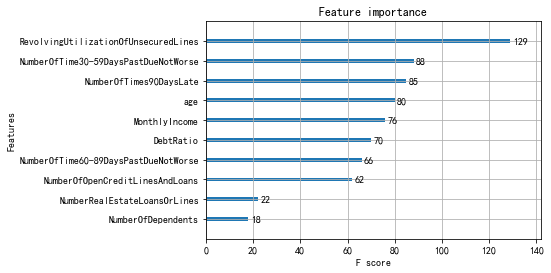

In [31]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(model)
plt.show()

***
<center><h1>####答卷结束####</h1></center>